#### The purpose of this notebook is to investigate the BigMac price trend overtime and have a look at other interesting economic indicators. 

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# load and display the dataframe
df = pd.read_csv('/content/big-mac-full-index.csv')
df.head()

,date,currency_code,name,local_price,dollar_ex,dollar_price
0,4/1/2000,ARS,Argentina,2.50,1.00,2.500000
1,4/1/2000,AUD,Australia,2.59,1.68,1.541667
2,4/1/2000,BRL,Brazil,2.95,1.79,1.648045
3,4/1/2000,CAD,Canada,2.85,1.47,1.938776
4,4/1/2000,CHF,Switzerland,5.90,1.70,3.470588


In [43]:
# View last 5 rows
df.tail()

,date,currency_code,name,local_price,dollar_ex,dollar_price
1626,7/1/2022,UYU,Uruguay,255.00,41.91000,6.084467
1627,7/1/2022,USD,United States,5.15,1.00000,5.150000
1628,7/1/2022,VES,Venezuela,10.00,5.67320,1.762674
1629,7/1/2022,VND,Vietnam,69000.00,23417.00000,2.946577
1630,7/1/2022,ZAR,South Africa,39.90,17.03625,2.342065


In [44]:
# Display the shape (number of rows and columns) of the dataframe
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

Rows: 1631
Columns: 6


In [45]:
# Check for any missing values
df.isna().sum()

date             0
currency_code    0
name             0
local_price      0
dollar_ex        0
dollar_price     0
dtype: int64

In [46]:
#Check for any duplicates
df.duplicated().sum()

0

In [47]:
# Get more info on the dataframe such as data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1631 entries, 0 to 1630
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1631 non-null   object 
 1   currency_code  1631 non-null   object 
 2   name           1631 non-null   object 
 3   local_price    1631 non-null   float64
 4   dollar_ex      1631 non-null   float64
 5   dollar_price   1631 non-null   float64
dtypes: float64(3), object(3)
memory usage: 76.6+ KB


In [48]:
# Rename 'name' column to country 
df.rename(columns = {'name':'country'}, inplace=True)

In [49]:
df.columns

Index(['date', 'currency_code', 'country', 'local_price', 'dollar_ex',
       'dollar_price'],
      dtype='object')

In [50]:
# Convert date datatype from object to datetime

df['date'] = pd.to_datetime(df['date'])
df['date'].dtypes

dtype('<M8[ns]')

In [51]:
# Create 'Year' and 'month' columns
df['year'] = df['date'].dt.year
df.head()

,date,currency_code,country,local_price,dollar_ex,dollar_price,year
0,2000-04-01,ARS,Argentina,2.50,1.00,2.500000,2000
1,2000-04-01,AUD,Australia,2.59,1.68,1.541667,2000
2,2000-04-01,BRL,Brazil,2.95,1.79,1.648045,2000
3,2000-04-01,CAD,Canada,2.85,1.47,1.938776,2000
4,2000-04-01,CHF,Switzerland,5.90,1.70,3.470588,2000


In [52]:
# Look for all unique countries in the dataset 
df['country'].unique()

array(['Argentina', 'Australia', 'Brazil', 'Canada', 'Switzerland',
       'Chile', 'China', 'Czech Republic', 'Denmark', 'Euro area',
       'Britain', 'Hong Kong', 'Hungary', 'Indonesia', 'Israel', 'Japan',
       'South Korea', 'Mexico', 'Malaysia', 'New Zealand', 'Poland',
       'Russia', 'Singapore', 'Sweden', 'Thailand', 'Taiwan',
       'United States', 'South Africa', 'Philippines', 'Norway', 'Peru',
       'Turkey', 'Venezuela', 'Egypt', 'Colombia', 'Costa Rica',
       'Sri Lanka', 'Pakistan', 'Saudi Arabia', 'Ukraine', 'Uruguay',
       'UAE', 'India', 'Vietnam', 'United Arab Emirates', 'Azerbaijan',
       'Bahrain', 'Guatemala', 'Honduras', 'Croatia', 'Jordan', 'Kuwait',
       'Lebanon', 'Moldova', 'Nicaragua', 'Oman', 'Qatar', 'Romania'],
      dtype=object)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1631 entries, 0 to 1630
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1631 non-null   datetime64[ns]
 1   currency_code  1631 non-null   object        
 2   country        1631 non-null   object        
 3   local_price    1631 non-null   float64       
 4   dollar_ex      1631 non-null   float64       
 5   dollar_price   1631 non-null   float64       
 6   year           1631 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 89.3+ KB


In [54]:
# Create a dataframe containing only South african data
df_Sa = df[df['country'] == 'Saudi Arabia']
df_Sa

,date,currency_code,country,local_price,dollar_ex,dollar_price,year
150,2004-05-01,SAR,Saudi Arabia,2.4,3.75020,0.639966,2004
191,2005-06-01,SAR,Saudi Arabia,9.0,3.75010,2.399936,2005
264,2006-05-01,SAR,Saudi Arabia,9.0,3.74900,2.400640,2006
305,2007-01-01,SAR,Saudi Arabia,9.0,3.74900,2.400640,2007
346,2007-06-01,SAR,Saudi Arabia,9.0,3.75045,2.399712,2007
387,2008-06-01,SAR,Saudi Arabia,10.0,3.74955,2.666987,2008
428,2009-07-01,SAR,Saudi Arabia,11.0,3.75040,2.933020,2009
469,2010-01-01,SAR,Saudi Arabia,10.0,3.75020,2.666524,2010
510,2010-07-01,SAR,Saudi Arabia,10.0,3.75045,2.666347,2010
552,2011-07-01,SAR,Saudi Arabia,10.0,3.75020,2.666524,2011


In [96]:
df_Sa['country']

,date,currency_code,country,local_price,dollar_ex,dollar_price,year,0,1,2,3,4,5,6
150,2004-05-01,SAR,Saudi Arabia,2.4,3.75020,0.639966,2004,date,currency_code,country,local_price,dollar_ex,dollar_price,year
191,2005-06-01,SAR,Saudi Arabia,9.0,3.75010,2.399936,2005,date,currency_code,country,local_price,dollar_ex,dollar_price,year
264,2006-05-01,SAR,Saudi Arabia,9.0,3.74900,2.400640,2006,date,currency_code,country,local_price,dollar_ex,dollar_price,year
305,2007-01-01,SAR,Saudi Arabia,9.0,3.74900,2.400640,2007,date,currency_code,country,local_price,dollar_ex,dollar_price,year
346,2007-06-01,SAR,Saudi Arabia,9.0,3.75045,2.399712,2007,date,currency_code,country,local_price,dollar_ex,dollar_price,year
387,2008-06-01,SAR,Saudi Arabia,10.0,3.74955,2.666987,2008,date,currency_code,country,local_price,dollar_ex,dollar_price,year
428,2009-07-01,SAR,Saudi Arabia,11.0,3.75040,2.933020,2009,date,currency_code,country,local_price,dollar_ex,dollar_price,year
469,2010-01-01,SAR,Saudi Arabia,10.0,3.75020,2.666524,2010,date,currency_code,country,local_price,dollar_ex,dollar_price,year
510,2010-07-01,SAR,Saudi Arabia,10.0,3.75045,2.666347,2010,date,currency_code,country,local_price,dollar_ex,dollar_price,year
552,2011-07-01,SAR,Saudi Arabia,10.0,3.75020,2.666524,2011,date,currency_code,country,local_price,dollar_ex,dollar_price,year


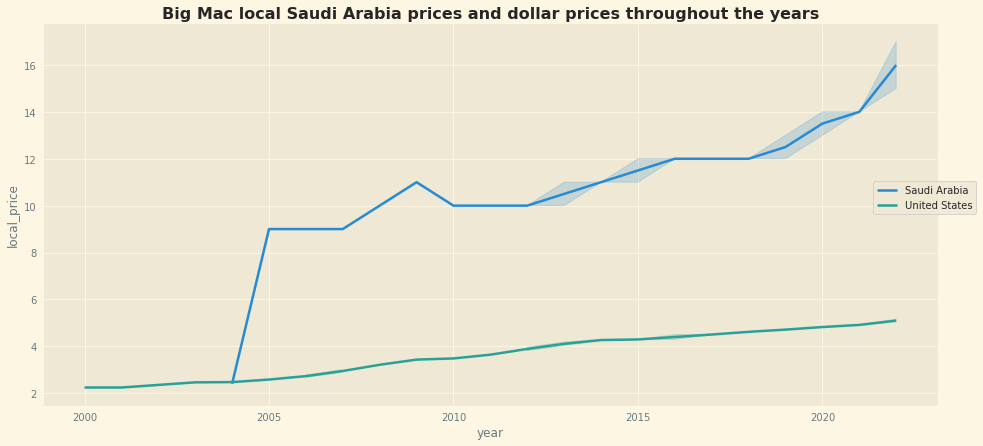

In [83]:
plt.style.use('Solarize_Light2')
plt.figure(figsize=(16,7))
plt.title("Big Mac local Saudi Arabia prices and dollar prices throughout the years",fontweight="bold")
sns.lineplot(x = df['year'], y =df.loc[df['country']=='Saudi Arabia']['local_price'], linewidth=2.5, label='Saudi Arabia')
sns.lineplot(x = df['year'], y =df.loc[df['country']=='United States']['dollar_price'], linewidth=2.5, label='United States')
plt.xticks([2000,2005,2010,2015,2020])
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.show()

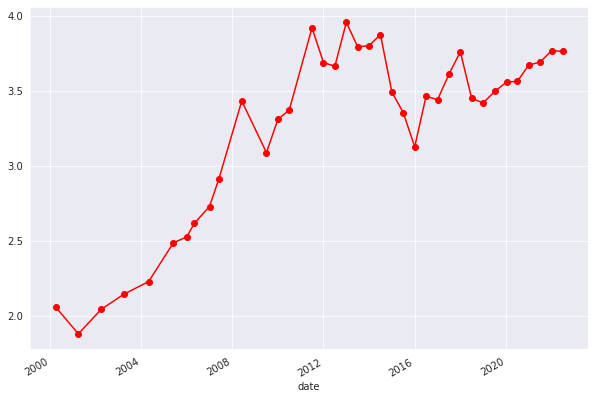

In [58]:
# The Average Dollar price across the years
df.groupby('date').dollar_price.mean().plot(kind='line', figsize=(10,7), color='red', marker='o')
plt.show()

In [59]:
df['country'].unique()

array(['Argentina', 'Australia', 'Brazil', 'Canada', 'Switzerland',
       'Chile', 'China', 'Czech Republic', 'Denmark', 'Euro area',
       'Britain', 'Hong Kong', 'Hungary', 'Indonesia', 'Israel', 'Japan',
       'South Korea', 'Mexico', 'Malaysia', 'New Zealand', 'Poland',
       'Russia', 'Singapore', 'Sweden', 'Thailand', 'Taiwan',
       'United States', 'South Africa', 'Philippines', 'Norway', 'Peru',
       'Turkey', 'Venezuela', 'Egypt', 'Colombia', 'Costa Rica',
       'Sri Lanka', 'Pakistan', 'Saudi Arabia', 'Ukraine', 'Uruguay',
       'UAE', 'India', 'Vietnam', 'United Arab Emirates', 'Azerbaijan',
       'Bahrain', 'Guatemala', 'Honduras', 'Croatia', 'Jordan', 'Kuwait',
       'Lebanon', 'Moldova', 'Nicaragua', 'Oman', 'Qatar', 'Romania'],
      dtype=object)

In [60]:
# Number Of Countries in the dataset
df['country'].nunique()

58

In [61]:
# Map Country to Continent
df['continent'] = df.country.map({'Argentina': 'South America',
             'Azerbaijan' : 'Middle East',                      
             'Australia': 'Oceania',
             'Austria' : 'Central Europe',                      
             'Brazil': 'South America',               
             'Belgium' : 'Northwestern Europe',                      
             'Canada': 'North America',
             'Venezuela' : 'South America',                     
             'Switzerland': 'Western Europe',
             'Chile': 'South America',
             'China': 'East Asia',
             'Czech Republic': 'Eastern Europe',
             'Denmark': 'Western Europe',
             'Euro area': 'Europe',
             'Finland' : 'Nothern Europe',                      
             'Britain': 'Western Europe',
             'Hong Kong': 'East Asia',
             'Hungary': 'Eastern Europe',
             'Indonesia': 'South Asia',
             'Ireland': 'Northwestern Europe',                      
             'Japan': 'East Asia',
             'Germany' : 'Central Europe',                      
             'Greece': 'Southeastern Europe',
             'Bahrain' : 'Western Asia',                  
             'South Korea': 'East Asia',
             'Mexico': 'North America',
             'Malaysia': 'South Asia',
             'New Zealand': 'Oceania',
             'Poland': 'Eastern Europe',
             'Russia': 'Eastern Europe',
             'Spain' : 'Southwestern Europe',
             'Portugal' : 'Southwestern Europe',                     
             'Sweden': 'Western Europe',
             'France' : 'Western Europe',                      
             'Italy' : 'Southern Europe',                      
             'Singapore': 'South Asia',
             'Thailand': 'South Asia',
             'India' : 'South Asia',
             'Taiwan': 'East Asia',
             'United States': 'North America',
             'South Africa': 'Southern Africa',
             'Philippines': 'East Asia',
             'Norway': 'Western Europe',
             'Peru': 'South America',
             'Turkey': 'Southwestern Asia',
             'Egypt': 'Middle East',
             'Colombia': 'South America',
             'Costa Rica': 'North America',
             'Sri Lanka': 'South Asia',
             'Pakistan': 'Middle East',
             'Saudi Arabia': 'Middle East',
             'Ukraine': 'Eastern Europe',
             'Uruguay': 'South America',
             'Vietnam' : 'Southeastern Asia',                      
             'Israel': 'Middle East',
             'Netherlands': 'Northwestern Europe',
             'United Arab Emirates': 'Western Asia',
             'Estonia': 'Northern Europe',
             'Guatemala': 'North America',
             'Moldova': 'Eastern Europe',
             'Nicaragua': 'North America',
             'Lithuania': 'Northeastern Europe',
             'Slovakia': 'Central Europe',
             'Slovenia': 'Central Europe',
             'Honduras': 'North America',
             'Oman': 'Southwestern Asia',
             'Lebanon':'Western Asia',
             'Kuwait': 'Middle East',
             'Jordan' : 'Middle East',                      
             'Latvia': 'Northern Europe',
             'Croatia' : 'Southeastern Europe',                      
             'Romania': 'Southeastern Europe',                   
             'Qatar': 'Western Asia',
             })

In [62]:
df['continent'].unique()

array(['South America', 'Oceania', 'North America', 'Western Europe',
       'East Asia', 'Eastern Europe', 'Europe', 'South Asia',
       'Middle East', 'Southern Africa', 'Southwestern Asia', nan,
       'Southeastern Asia', 'Western Asia', 'Southeastern Europe'],
      dtype=object)

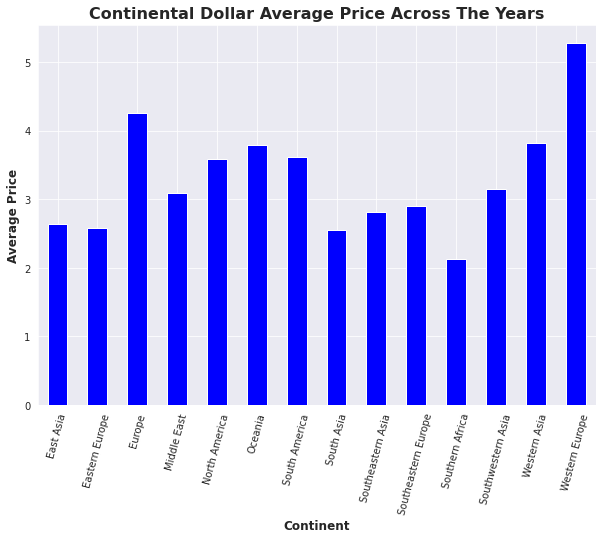

In [63]:
# The Average Dollar price per continent (part of the continent) across the years
df.groupby('continent').dollar_price.mean().plot(kind='bar', figsize=(10,7), color='blue')
plt.xticks(rotation = 75)
plt.title("Continental Dollar Average Price Across The Years", fontsize=16, fontweight="bold")
plt.xlabel("Continent", fontsize=12, fontweight="bold")
plt.ylabel("Average Price", fontsize=12, fontweight="bold")
plt.show()

In [99]:
import plotly.express as px

fig = px.scatter(df_Sa, x=df_Sa['local_price'], y=df_Sa['country'], animation_frame=df_Sa['year'],
        color=df_Sa['country'], hover_name=df_Sa['country'],range_x=[0.5,32],log_x=True)

fig.show()